In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import pylab as pl


# Load the data into a Pandas DataFrame
data = pd.read_csv("studentpredict.csv", delimiter=',')

#save data to df as well that will be used only on visualisation part
df = data

In [2]:
data["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

### We are trying to determine whether a student will Graduate or Dropout, the data for students Enrolled is not really relevant, so we drop those rows.

In [3]:
data.shape

(4424, 35)

In [4]:
data = data[data.Target != "Enrolled"]

In [5]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [7]:
data = data.drop_duplicates()

In [8]:
data.shape

(3630, 35)

In [9]:
data._get_numeric_data().columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [164]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100

missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent %"])
print(missing_data.head(20))

                                                Total  Percent %
Marital status                                      0        0.0
Curricular units 2nd sem (enrolled)                 0        0.0
Curricular units 1st sem (enrolled)                 0        0.0
Curricular units 1st sem (evaluations)              0        0.0
Curricular units 1st sem (approved)                 0        0.0
Curricular units 1st sem (grade)                    0        0.0
Curricular units 1st sem (without evaluations)      0        0.0
Curricular units 2nd sem (credited)                 0        0.0
Curricular units 2nd sem (evaluations)              0        0.0
International                                       0        0.0
Curricular units 2nd sem (approved)                 0        0.0
Curricular units 2nd sem (grade)                    0        0.0
Curricular units 2nd sem (without evaluations)      0        0.0
Unemployment rate                                   0        0.0
Inflation rate           

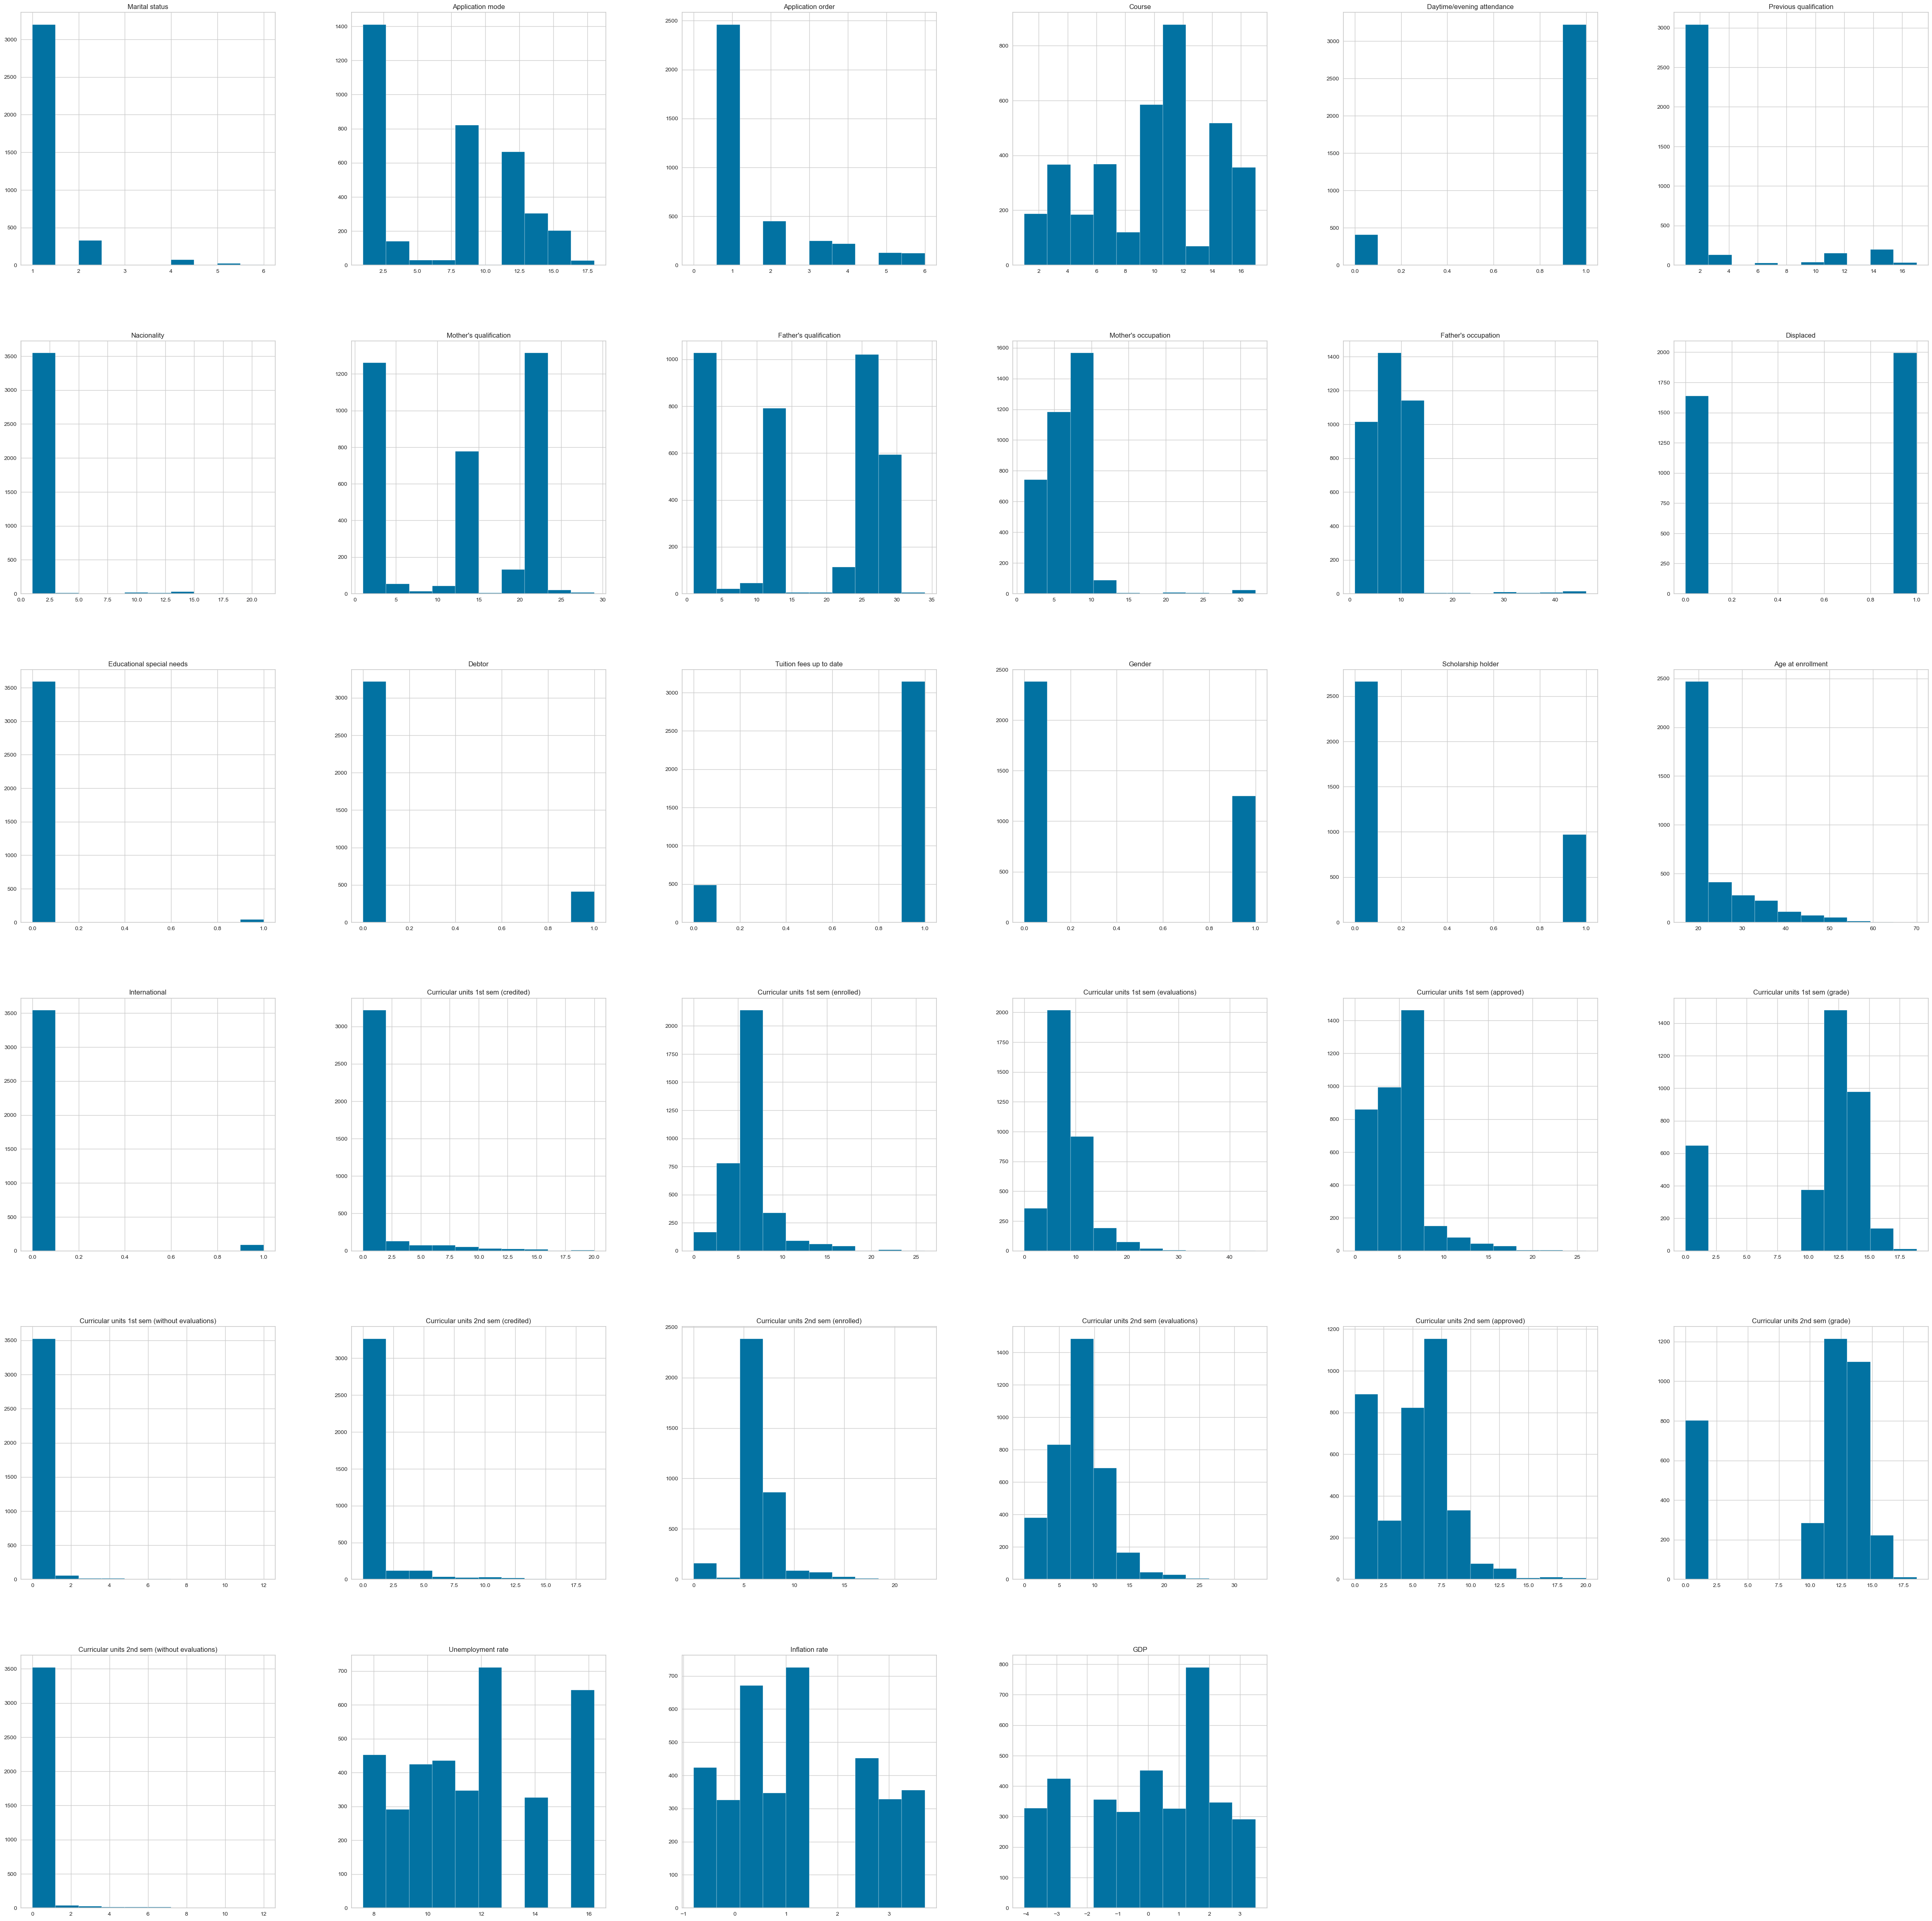

In [165]:
# Calculate summary statistics
summary = data.describe(include = "all")

# Visualize distributions of variables
data.hist(figsize=(60, 60))

# Identify missing values
missing = data.isnull().sum()

In [166]:
summary

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.184298,6.810193,1.750138,9.935537,0.887603,2.552617,1.242424,12.558678,16.663636,7.212948,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,NaN
std,0.613009,5.253618,1.333831,4.340715,0.315897,3.952440,1.700394,9.006183,10.993025,3.707343,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,8.000000,1.000000,11.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,NaN


In [167]:
missing

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [168]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [169]:
data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


Text(0, 0.5, 'Count')

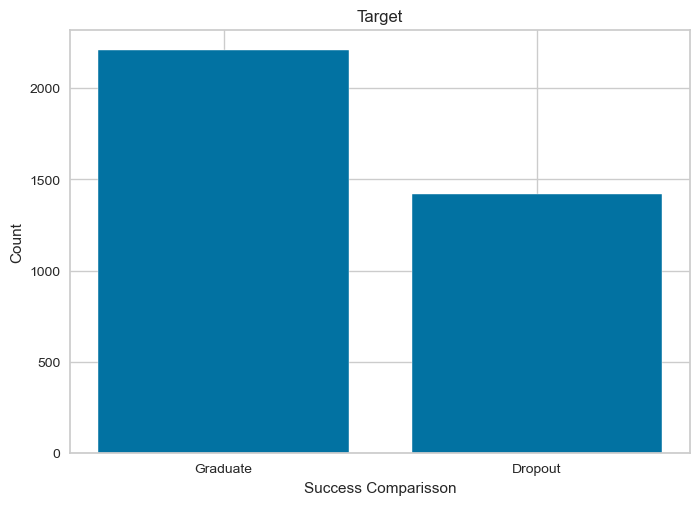

In [170]:
#Bar chart
Target_Analysis = data["Target"].value_counts()
plt.bar(Target_Analysis.index, Target_Analysis.values)
plt.title("Target")
plt.xlabel("Success Comparisson")
plt.ylabel("Count")

Text(0.5, 1.0, 'Success Rate')

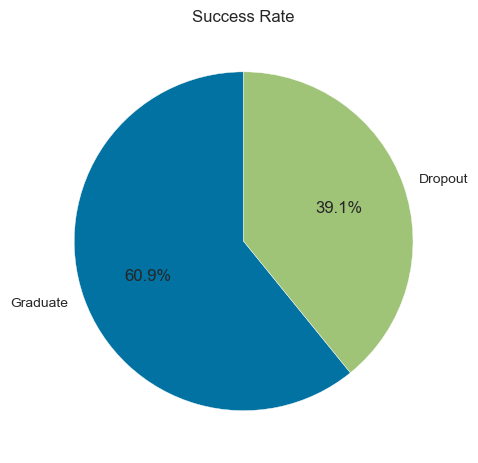

In [171]:
# Create pie chart Target values
Target_Rate = Target_Analysis / Target_Analysis.sum()
labels = ["Graduate", "Dropout"]
plt.pie(Target_Rate.values, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Success Rate")

In [172]:
data['Target'].replace(['Graduate', 'Dropout'], [1, 0], inplace=True)

In [173]:
data.shape

(3630, 35)

In [174]:
# Fill in missing values with column means
data.fillna(data.mean(), inplace=True)


# Convert categorical variables to numerical form using one-hot encoding
categorical_cols = ["Target"]
for col in categorical_cols:
    dummies = pd.get_dummies(data[col], prefix=col)
    data_enc = pd.concat([data, dummies], axis=1)
    data_enc.drop(col, axis=1, inplace=True)

# Scale the data using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_enc)
data_scaled = pd.DataFrame(data_scaled, columns=data_enc.columns)

In [175]:
print(data_scaled)

      Marital status  Application mode  Application order    Course  \
0          -0.300686          0.226505           2.436822 -1.828415   
1          -0.300686         -0.154237          -0.562471  0.245261   
2          -0.300686         -1.106094           2.436822 -1.137190   
3          -0.300686          0.226505           0.187353  1.166895   
4           1.330837          0.987990          -0.562471 -1.598007   
...              ...               ...                ...       ...   
3625       -0.300686         -1.106094           3.186646  1.166895   
3626       -0.300686         -1.106094           0.187353  1.166895   
3627       -0.300686         -1.106094          -0.562471  0.475670   
3628       -0.300686         -1.106094          -0.562471 -0.215556   
3629       -0.300686         -0.344609          -0.562471  1.166895   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                       0.355850               -0.392879    -0.142589   
1

In [176]:
data_scaled.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_0,Target_1
count,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,...,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03,3.630000e+03
mean,9.395606e-17,-1.135302e-16,3.131869e-17,-4.893545e-17,1.722528e-16,-3.229740e-17,2.348902e-17,1.096154e-16,-2.740385e-17,7.829672e-17,...,-1.663805e-17,-1.957418e-17,-1.213599e-16,3.542927e-16,-3.229740e-17,1.174451e-17,-8.808381e-18,-4.208449e-17,8.612639e-17,-1.174451e-16
std,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,...,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00
min,-3.006856e-01,-1.106094e+00,-1.312294e+00,-2.058824e+00,-2.810171e+00,-3.928791e-01,-1.425891e-01,-1.283593e+00,-1.425067e+00,-1.676080e+00,...,-2.782691e+00,-1.958586e+00,-1.429014e+00,-1.831085e+00,-1.901484e-01,-1.511034e+00,-1.467154e+00,-1.792623e+00,-8.020458e-01,-1.246812e+00
25%,-3.006856e-01,-1.106094e+00,-5.624708e-01,-9.067814e-01,3.558503e-01,-3.928791e-01,-1.425891e-01,-1.172543e+00,-1.243108e+00,-5.969916e-01,...,-5.729500e-01,-4.448173e-01,-7.964910e-01,8.788601e-02,-1.901484e-01,-8.361906e-01,-6.727696e-01,-7.482245e-01,-8.020458e-01,-1.246812e+00
50%,-3.006856e-01,2.265051e-01,-5.624708e-01,2.452613e-01,3.558503e-01,-3.928791e-01,-1.425891e-01,4.900890e-02,-2.423358e-01,-3.272195e-01,...,-1.310017e-01,5.977232e-02,1.522934e-01,4.191176e-01,-1.901484e-01,-1.988382e-01,1.216146e-01,1.457096e-01,-8.020458e-01,8.020458e-01
75%,-3.006856e-01,9.879900e-01,1.873525e-01,7.060784e-01,3.558503e-01,-3.928791e-01,-1.425891e-01,1.048460e+00,9.403952e-01,7.518691e-01,...,3.109465e-01,5.643619e-01,4.685549e-01,6.319747e-01,-1.901484e-01,8.509186e-01,9.882155e-01,7.962457e-01,1.246812e+00,8.020458e-01
max,7.856928e+00,2.130217e+00,3.186646e+00,1.627713e+00,3.558503e-01,3.655811e+00,1.162101e+01,1.825811e+00,1.577250e+00,6.686856e+00,...,7.382118e+00,6.367142e+00,4.896215e+00,1.557251e+00,1.586191e+01,1.713219e+00,1.782600e+00,1.557417e+00,1.246812e+00,8.020458e-01


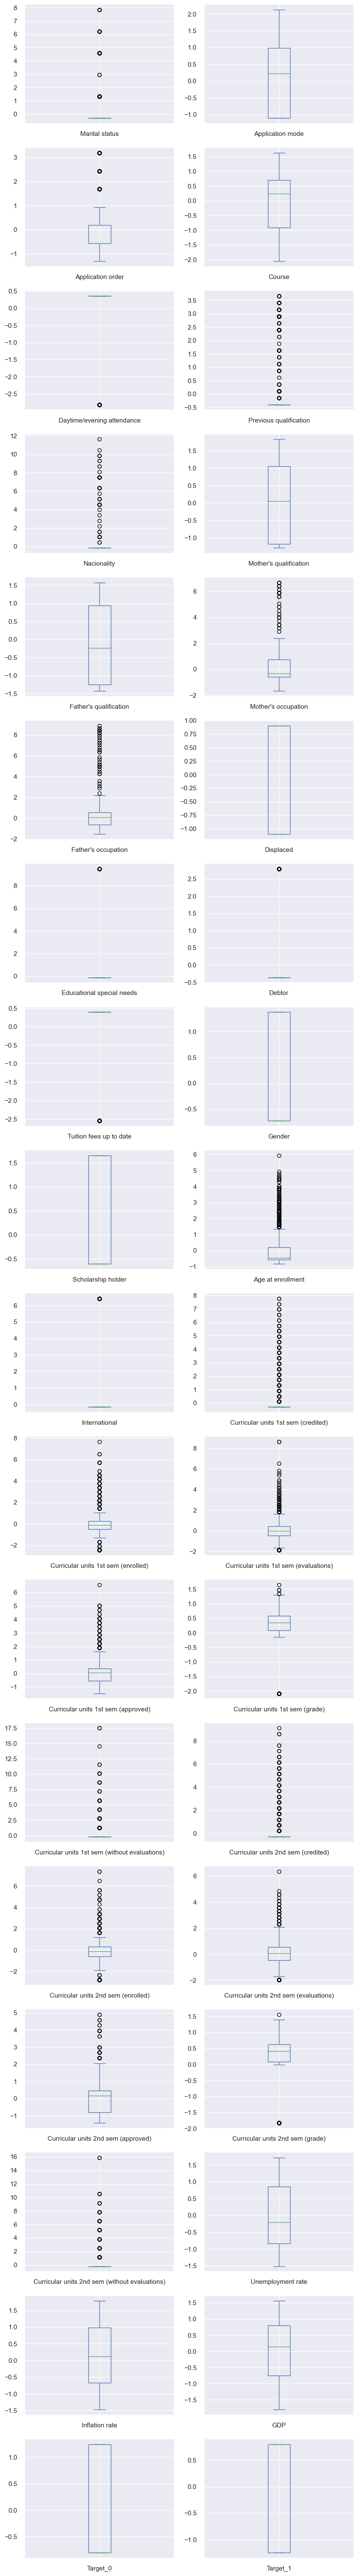

In [177]:
sns.set(font_scale=1)
data_scaled.plot(kind='box', figsize=(10,100), subplots=True, layout=(23,2), sharex=False, sharey=False, grid=True)
plt.show()

<Axes: >

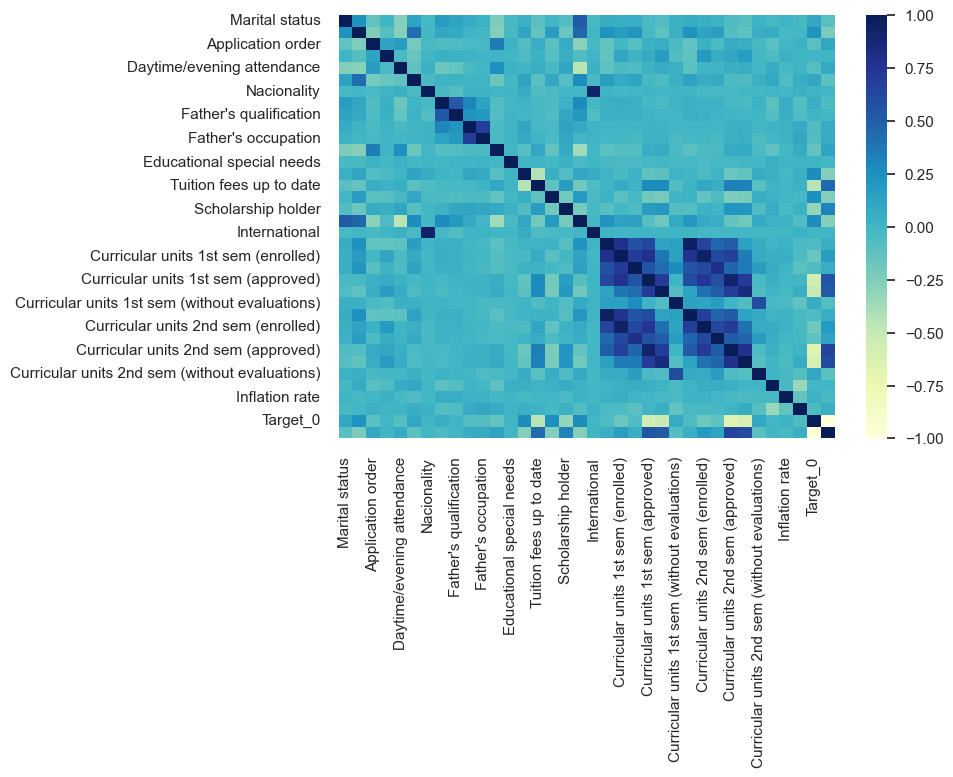

In [178]:
# Create correlation matrix
corr_matrix = data_scaled.corr()

# Create heatmap of correlation matrix
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [179]:
# creation of correlation matrix
corrmat = data_scaled.corr()
corrmat

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_0,Target_1
Marital status,1.000000,0.235554,-0.130370,0.003120,-0.265823,0.134920,-0.020139,0.177000,0.122920,0.070876,...,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,0.100479,-0.100479
Application mode,0.235554,1.000000,-0.246369,-0.083865,-0.276859,0.429339,-0.009654,0.096560,0.086848,0.014639,...,0.129428,0.160493,-0.076839,-0.124287,0.052751,0.075779,-0.027668,-0.014998,0.233888,-0.233888
Application order,-0.130370,-0.246369,1.000000,0.124436,0.165494,-0.204205,-0.033548,-0.055105,-0.054670,-0.036993,...,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,-0.094355,0.094355
Course,0.003120,-0.083865,0.124436,1.000000,-0.033420,-0.156097,0.002081,0.039210,0.031936,0.015836,...,0.184817,0.063649,0.104974,0.171483,-0.015006,-0.053998,0.038674,0.005770,-0.006814,0.006814
Daytime/evening attendance,-0.265823,-0.276859,0.165494,-0.033420,1.000000,-0.120619,0.032272,-0.179286,-0.133407,-0.035792,...,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,-0.084496,0.084496
Previous qualification,0.134920,0.429339,-0.204205,-0.156097,-0.120619,1.000000,-0.035397,0.011777,0.022088,0.001426,...,0.052077,0.084018,-0.046298,-0.051467,0.045677,0.086015,-0.059770,0.058446,0.102795,-0.102795
Nacionality,-0.020139,-0.009654,-0.033548,0.002081,0.032272,-0.035397,1.000000,-0.029701,-0.075359,0.023369,...,-0.028418,-0.025326,-0.017487,-0.010592,-0.012158,-0.002953,-0.010158,0.028410,0.003823,-0.003823
Mother's qualification,0.177000,0.096560,-0.055105,0.039210,-0.179286,0.011777,-0.029701,1.000000,0.532757,0.309000,...,0.030811,0.030954,-0.024289,-0.031406,0.027816,-0.113616,0.055484,-0.071692,0.048459,-0.048459
Father's qualification,0.122920,0.086848,-0.054670,0.031936,-0.133407,0.022088,-0.075359,0.532757,1.000000,0.222273,...,0.028976,0.014340,0.002196,-0.007022,0.002835,-0.072628,0.061684,-0.058259,0.003850,-0.003850
Mother's occupation,0.070876,0.014639,-0.036993,0.015836,-0.035792,0.001426,0.023369,0.309000,0.222273,1.000000,...,0.001080,-0.006691,0.030936,0.041212,-0.001678,0.009914,0.030070,0.070732,-0.064195,0.064195


In [180]:
data_scaled.rename(columns={
    "Target_0": "Dropout",
    "Target_1": "Graduate",
}, inplace=True)

Text(0.5, 1.0, 'Correlation between coded and numerical features')

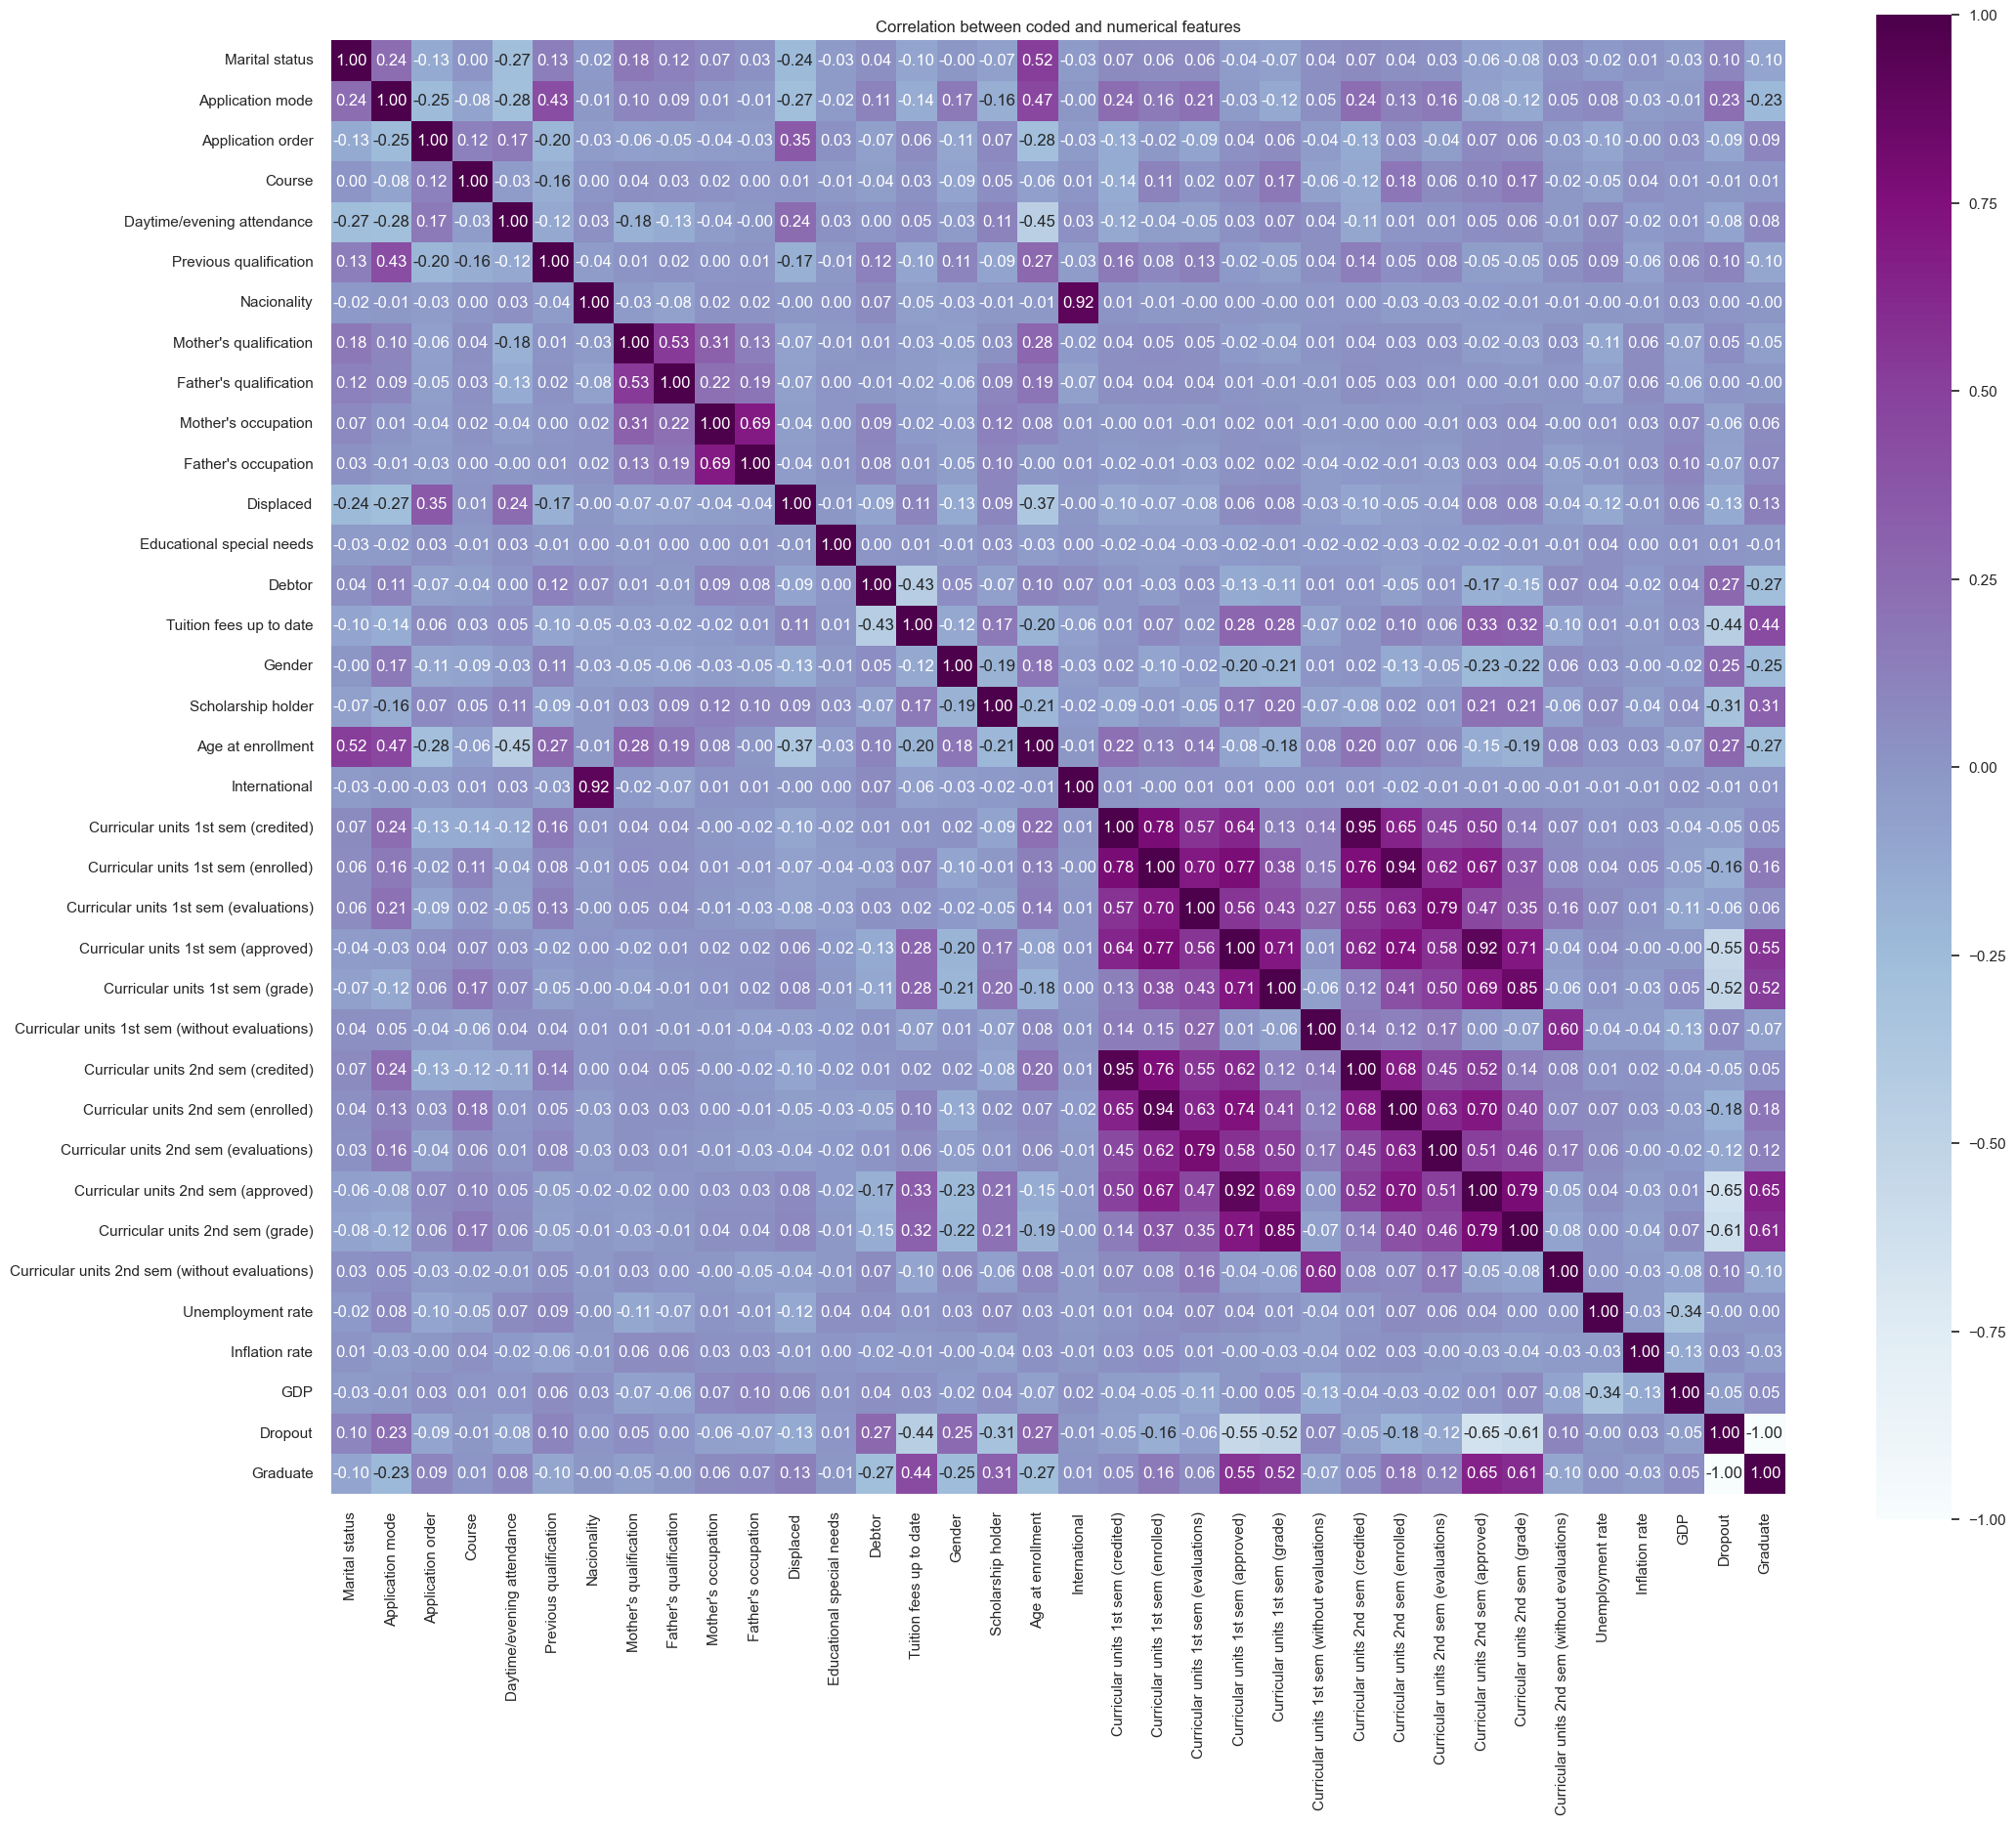

In [181]:
# Calculate the correlation matrix
corr = data_scaled.corr()

# Visualize the correlation matrix
sns.set(font_scale=1)
plt.figure(figsize=(24, 20))

sns.heatmap(corr, fmt='.2f', 
            linewidths=0.002,
            square=True, annot=True, cmap="BuPu", linecolor="red")
plt.title('Correlation between coded and numerical features')

In [182]:
Drop_corr = data_scaled.corrwith(data_scaled['Dropout'])
Drop_corr = Drop_corr.to_frame()
Drop_filter = Drop_corr[(Drop_corr[0]> 0)]
Drop_filter = Drop_filter.drop("Dropout")
print(Drop_filter)

                                                       0
Marital status                                  0.100479
Application mode                                0.233888
Previous qualification                          0.102795
Nacionality                                     0.003823
Mother's qualification                          0.048459
Father's qualification                          0.003850
Educational special needs                       0.007254
Debtor                                          0.267207
Gender                                          0.251955
Age at enrollment                               0.267229
Curricular units 1st sem (without evaluations)  0.074642
Curricular units 2nd sem (without evaluations)  0.102687
Inflation rate                                  0.030326


<Axes: >

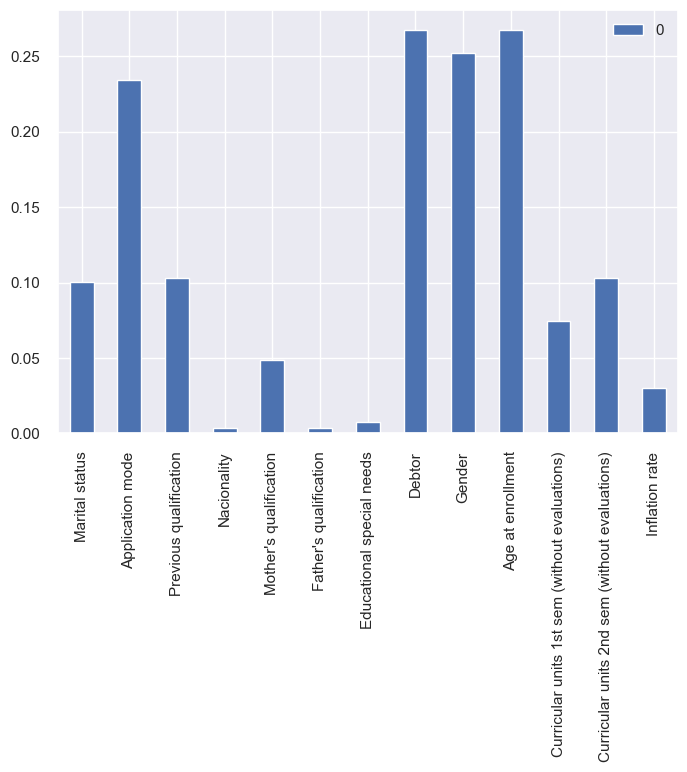

In [183]:
Drop_filter.plot.bar()

In [184]:
Graduate_corr = data_scaled.corrwith(data_scaled['Graduate'])
Graduate_corr = Graduate_corr.to_frame()
Graduate_filter = Graduate_corr[Graduate_corr[0]> 0]
Graduate_filter = Graduate_filter.drop("Graduate")
print(Graduate_filter)

                                               0
Application order                       0.094355
Course                                  0.006814
Daytime/evening attendance              0.084496
Mother's occupation                     0.064195
Father's occupation                     0.073238
Displaced                               0.126113
Tuition fees up to date                 0.442138
Scholarship holder                      0.313018
International                           0.006181
Curricular units 1st sem (credited)     0.046900
Curricular units 1st sem (enrolled)     0.161074
Curricular units 1st sem (evaluations)  0.059786
Curricular units 1st sem (approved)     0.554881
Curricular units 1st sem (grade)        0.519927
Curricular units 2nd sem (credited)     0.052402
Curricular units 2nd sem (enrolled)     0.182897
Curricular units 2nd sem (evaluations)  0.119239
Curricular units 2nd sem (approved)     0.653995
Curricular units 2nd sem (grade)        0.605350
Unemployment rate   

<Axes: >

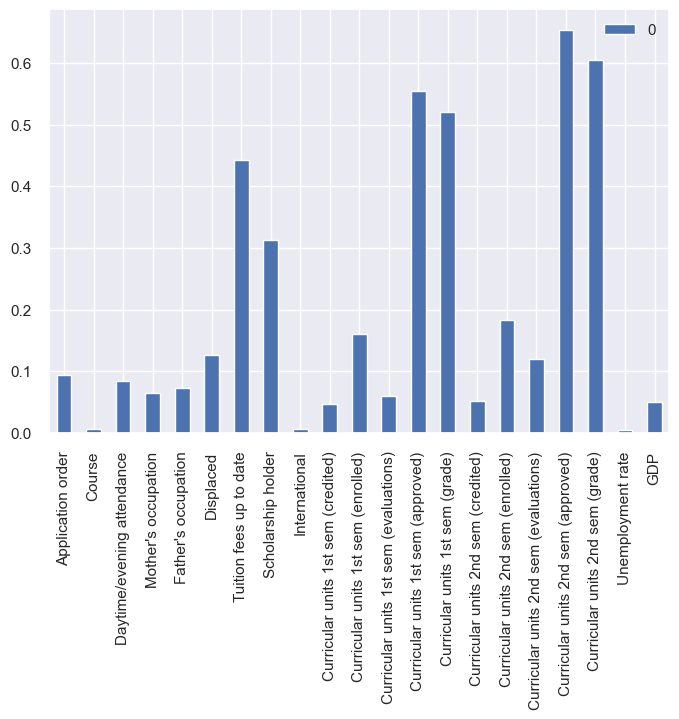

In [185]:
Graduate_filter.plot.bar()

## Selecting the relevant variables 

In [186]:
# convert to pandas DataFrame
df = pd.DataFrame(data, columns=data.columns)

# instantiate SelectKBest object with f_classif scoring function
selector = SelectKBest(f_classif, k=10)

# fit and transform data
selected_data = selector.fit_transform(df, data["Target"])

# convert back to pandas DataFrame
selected_df = pd.DataFrame(selected_data, columns=df.columns[selector.get_support()])

# print selected data
selected_df.head()

,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,0.0,1.0,1.0,0.0,20.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,1.0,0.0,19.0,6.0,14.000000,6.0,13.666667,1.0
2,0.0,0.0,1.0,0.0,19.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,1.0,0.0,0.0,20.0,6.0,13.428571,5.0,12.400000,1.0
4,0.0,1.0,0.0,0.0,45.0,5.0,12.333333,6.0,13.000000,1.0


###### 'Curricular units 1st sem (approved)' and 'Curricular units 1st sem (grade)' are highly correlated 0.71 same with 'Curricular units 2nd sem (approved)' and 'Curricular units 2nd sem (grade) 0.79

###### We can ignore 2 of them and our model's perfomance should not be affected

In [187]:
selected_df = selected_df.drop(['Curricular units 1st sem (grade)'], axis=1)

In [188]:
selected_df = selected_df.drop(['Curricular units 2nd sem (grade)'], axis=1)

In [189]:
selected_df.columns

Index(['Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (approved)',
       'Curricular units 2nd sem (approved)', 'Target'],
      dtype='object')

In [190]:
scaler = StandardScaler()
data_scaled2 = scaler.fit_transform(selected_df)
data_scaled2 = pd.DataFrame(data_scaled2, columns=selected_df.columns)
data_scaled2.head()

,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Target
0,-0.358302,0.393167,1.380697,-0.603447,-0.442212,-1.480034,-1.429014,-1.246812
1,-0.358302,-2.543450,1.380697,-0.603447,-0.569976,0.373306,0.468555,0.802046
2,-0.358302,-2.543450,1.380697,-0.603447,-0.569976,-1.480034,-1.429014,-1.246812
3,-0.358302,0.393167,-0.724272,-0.603447,-0.442212,0.373306,0.152293,0.802046
4,-0.358302,0.393167,-0.724272,-0.603447,2.751894,0.064416,0.468555,0.802046


In [191]:
from sklearn.decomposition import PCA

# convert back to pandas DataFrame
df = pd.DataFrame(data_scaled2, columns=data_scaled2.columns)

# instantiate PCA object with two components
pca = PCA(n_components=4)

# fit and transform data
pca_data = pca.fit_transform(data_scaled2)

# convert back to pandas DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# print transformed data
print(pca_df.head())

        PC1       PC2       PC3       PC4
0 -2.126221 -1.616229  0.686696  0.601066
1 -0.348033  1.140912  0.209795  1.008797
2 -3.109713 -0.412943 -0.238439  0.684788
3  0.953647 -0.218299  0.088776 -0.815580
4  0.315157  1.021473  1.534277 -1.297928


# Cross validation

In [192]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, precision_recall_curve
from sklearn import preprocessing
from sklearn import utils
from yellowbrick.classifier import ClassificationReport
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [193]:
#lab = preprocessing.LabelEncoder()

In [194]:
X = data_scaled2.drop(['Target'], axis=1)
y = data_scaled2['Target']

# this encoding has to be done because variable y appears to be continuous which is not good for a 
# classification model

lab = preprocessing.LabelEncoder()
y_t = lab.fit_transform(y)

X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y_t, test_size=0.3, random_state=42)

labels = ['Dropout', 'Graduate']

#y_t.head()
#display(data_scaled2.dtypes)

In [195]:
# Build and evaluate a logistic regression model

log_reg = LogisticRegression()
log_reg.fit(X_train_cv, y_train_cv)

y_pred_lr = log_reg.predict(X_test_cv)

print("Logistic Regression")
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test_cv, y_pred_lr))
print()
print("Classification Report")
print(classification_report(y_test_cv, y_pred_lr))

Logistic Regression

Confusion Matrix:
[[327  87]
 [ 33 642]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       414
           1       0.88      0.95      0.91       675

    accuracy                           0.89      1089
   macro avg       0.89      0.87      0.88      1089
weighted avg       0.89      0.89      0.89      1089



In [196]:
# Build and evaluate a decision tree model
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_cv, y_train_cv)

y_pred_dt = dt.predict(X_test_cv)

print("Decision Tree")
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test_cv, y_pred_dt))
print()
print("Classification Report")
print(classification_report(y_test_cv, y_pred_dt))

Decision Tree

Confusion Matrix:
[[324  90]
 [ 32 643]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       414
           1       0.88      0.95      0.91       675

    accuracy                           0.89      1089
   macro avg       0.89      0.87      0.88      1089
weighted avg       0.89      0.89      0.89      1089



In [197]:
# Build and evaluate a random forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_cv, y_train_cv)

y_pred_rf = rf.predict(X_test_cv)

print("Random Forest")
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test_cv, y_pred_rf))
print()
print("Classification Report")
print(classification_report(y_test_cv, y_pred_rf))

Random Forest

Confusion Matrix:
[[335  79]
 [ 37 638]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       414
           1       0.89      0.95      0.92       675

    accuracy                           0.89      1089
   macro avg       0.90      0.88      0.88      1089
weighted avg       0.89      0.89      0.89      1089



In [198]:
# Build and evaluate a neural network model
from sklearn.neural_network import MLPClassifier, MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_cv,y_train_cv)
#predict_train = mlp.predict(X_train_cv)
predict_test = mlp.predict(X_test_cv)

print("Neural Network")
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test_cv,predict_test))
print()
print("Classification Report")
print(classification_report(y_test_cv,predict_test))

Neural Network

Confusion Matrix:
[[329  85]
 [ 37 638]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       414
           1       0.88      0.95      0.91       675

    accuracy                           0.89      1089
   macro avg       0.89      0.87      0.88      1089
weighted avg       0.89      0.89      0.89      1089



In [199]:
# Build and evaluate a support vector machine model
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train_cv, y_train_cv)
y_pred_svc = svc.predict(X_test_cv)

print("SVC")
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test_cv, y_pred_svc))
print()
print("Classification Report")
print(classification_report(y_test_cv, y_pred_svc))

SVC

Confusion Matrix:
[[324  90]
 [ 28 647]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.78      0.85       414
           1       0.88      0.96      0.92       675

    accuracy                           0.89      1089
   macro avg       0.90      0.87      0.88      1089
weighted avg       0.89      0.89      0.89      1089



In [200]:
# Build and evaluate a Gradient Boosting model

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

gb_clf = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_cv, y_train_cv)
predictions = gb_clf.predict(X_test_cv)

print("Gradient Boosting")
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test_cv, predictions))
print()
print("Classification Report")
print(classification_report(y_test_cv, predictions))

Gradient Boosting

Confusion Matrix:
[[328  86]
 [ 36 639]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       414
           1       0.88      0.95      0.91       675

    accuracy                           0.89      1089
   macro avg       0.89      0.87      0.88      1089
weighted avg       0.89      0.89      0.89      1089



In [201]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_cv, y_train_cv)
y_pred_knn = knn.predict(X_test_cv)

print("KNeighbors")
print()
print("Confusion Matrix:")
print(confusion_matrix(y_test_cv, y_pred_knn))
print()
print("Classification Report:")
print(classification_report(y_test_cv, y_pred_knn))

KNeighbors

Confusion Matrix:
[[326  88]
 [ 46 629]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       414
           1       0.88      0.93      0.90       675

    accuracy                           0.88      1089
   macro avg       0.88      0.86      0.87      1089
weighted avg       0.88      0.88      0.88      1089



Logistic Regression
Cross-validated scores: [0.88567493 0.88567493 0.88429752 0.88980716 0.87603306]
Mean cross-validated score: 0.8842975206611572

Decision Tree
Cross-validated scores: [0.89393939 0.89669421 0.88016529 0.88842975 0.87878788]
Mean cross-validated score: 0.887603305785124

Random Forest
Cross-validated scores: [0.89669421 0.89669421 0.88705234 0.89256198 0.89118457]
Mean cross-validated score: 0.8928374655647383

Neural Network
Cross-validated scores: [0.89944904 0.89393939 0.87052342 0.88705234 0.89256198]
Mean cross-validated score: 0.8887052341597796

Gradient Boosting
Cross-validated scores: [0.89118457 0.89256198 0.87878788 0.88842975 0.89118457]
Mean cross-validated score: 0.8884297520661157

KNeighbors
Cross-validated scores: [0.89944904 0.88016529 0.86363636 0.89669421 0.87465565]
Mean cross-validated score: 0.8829201101928374



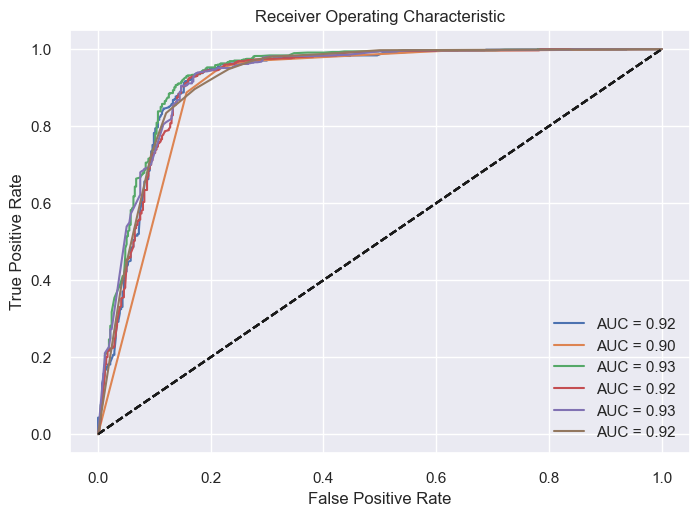

In [202]:
# Evaluate models using cross-validation
models = [log_reg, dt, rf, mlp, gb_clf, knn]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network', 'Gradient Boosting', 
               'KNeighbors']

for i, model in enumerate(models):
    scores = cross_val_score(model, X, y_t, cv=5, scoring='accuracy')
    print(model_names[i])
    print('Cross-validated scores:', scores)
    print('Mean cross-validated score:', np.mean(scores))
    print()
    
    y_proba = model.predict_proba(X_test_cv)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_cv, y_proba)
    auc_score = roc_auc_score(y_test_cv, y_proba)
    
    plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')

plt.show()

### SVC could not be included in Cross validation as I was getting this error

Some information about how to solve the issue here: https://towardsdatascience.com/pythons-predict-proba-doesn-t-actually-predict-probabilities-and-how-to-fix-it-f582c21d63fc

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[49], line 13

     10 print('Mean cross-validated score:', np.mean(scores))
     11 print()
     13 y_proba = model.predict_proba(X_test_cv)[:, 1]
     14 fpr, tpr, thresholds = roc_curve(y_test_cv, y_proba)
     15 auc_score = roc_auc_score(y_test_cv, y_proba)


File ~/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_available_if.py:32, in _AvailableIfDescriptor.__get__(self, obj, owner)

     26 attr_err = AttributeError(
     27     f"This {repr(owner.__name__)} has no attribute {repr(self.attribute_name)}"
     28 )
     29 if obj is not None:
     30     # delegate only on instances, not the classes.
     31     # this is to allow access to the docstrings.
     32     if not self.check(obj):
     33         raise attr_err
     34     out = MethodType(self.fn, obj)


File ~/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:829, in BaseSVC._check_proba(self)

    827 def _check_proba(self):
    828     if not self.probability:
    829         raise AttributeError(
    830             "predict_proba is not available when  probability=False"
    831         )
    832     if self._impl not in ("c_svc", "nu_svc"):
    833         raise AttributeError("predict_proba only implemented for SVC and NuSVC")


AttributeError: predict_proba is not available when  probability=False

## Preditive Modelling

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
import time

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_pred = log_reg.predict(X_test)

In [205]:
X_train.shape

(2904, 7)

In [206]:
X_test.shape

(726, 7)

### Logistic Regression

Execution time: 0.0097 seconds

Logistic regression accuracy: 0.884

Confusion Matrix
[[219  58]
 [ 26 423]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       277
           1       0.88      0.94      0.91       449

    accuracy                           0.88       726
   macro avg       0.89      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



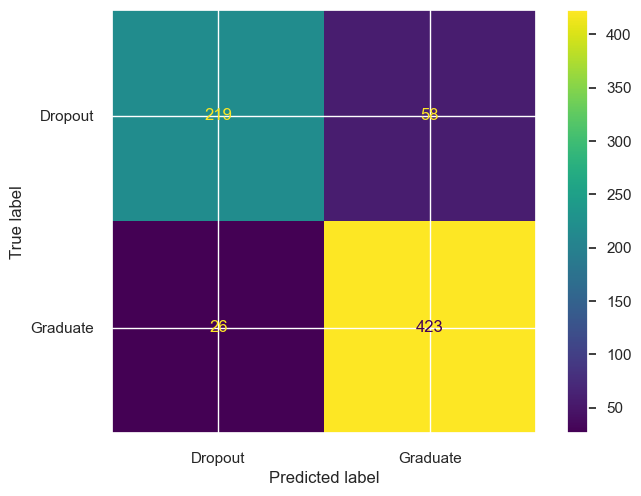

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=42)
start_time = time.time()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred)
end_time = time.time()

execution_time = end_time - start_time

print("Execution time: {:.4f} seconds".format(execution_time))
print()
print(f'Logistic regression accuracy: {accuracy_lr:.3f}')
print()
print('Confusion Matrix')
cm_lr = confusion_matrix(y_test, lr.predict(X_test_scaled))
print(cm_lr)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

cmd = ConfusionMatrixDisplay(cm_lr, display_labels=labels)
cmd.plot()

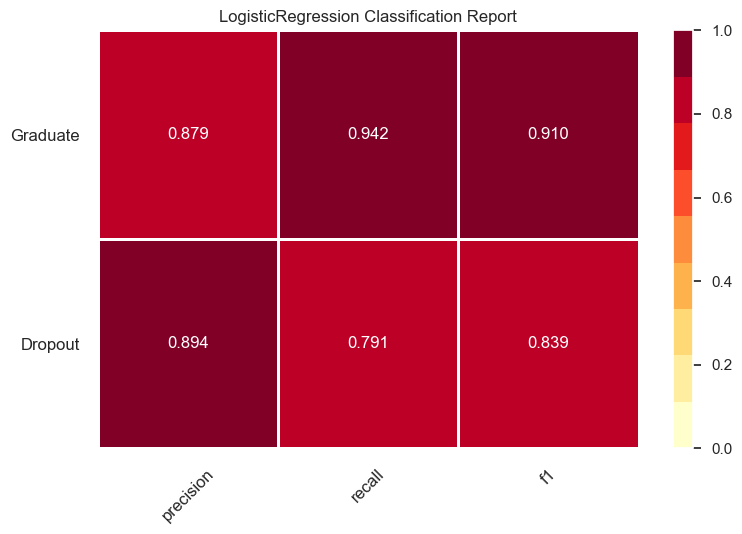

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [208]:
visualizer = ClassificationReport(lr, classes=['Dropout', 'Graduate'])
visualizer.score(X_test_scaled, y_test)
visualizer.show()

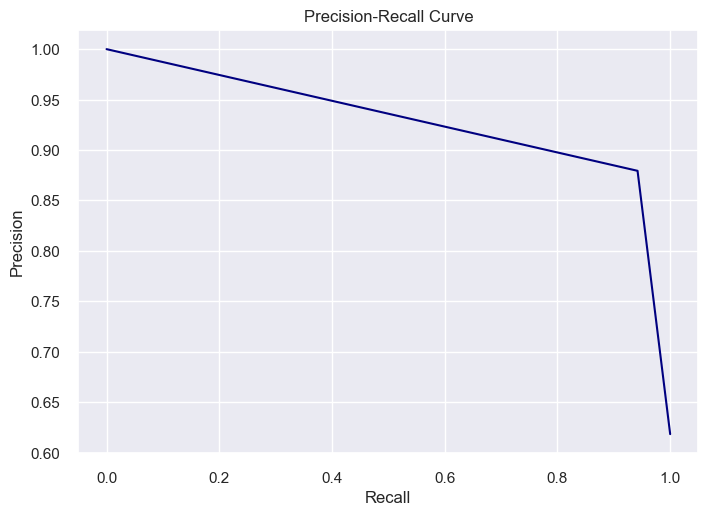

In [209]:
plt.plot(recall_lr, precision_lr, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### KNeighbors

Execution time: 0.0403 seconds

K-Neighbors: 0.883

Confusion Matrix
[[234  43]
 [ 42 407]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       277
           1       0.90      0.91      0.91       449

    accuracy                           0.88       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.88      0.88      0.88       726



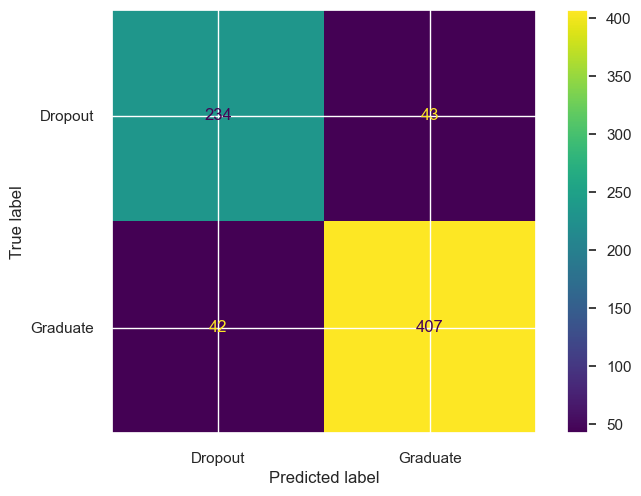

In [210]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=4)
start_time = time.time()
knc.fit(X_train_scaled, y_train)
y_pred = knc.predict(X_test_scaled)
accuracy_knc = knc.score(X_test_scaled, y_test)
precision_kn, recall_kn, thresholds_kn = precision_recall_curve(y_test, y_pred)
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: {:.4f} seconds".format(execution_time))
print()
print(f'K-Neighbors: {accuracy_knc:.3f}')
print()
print('Confusion Matrix')
cm_kn = confusion_matrix(y_test, knc.predict(X_test_scaled))
print(cm_kn)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

cmd = ConfusionMatrixDisplay(cm_kn, display_labels=labels)
cmd.plot()

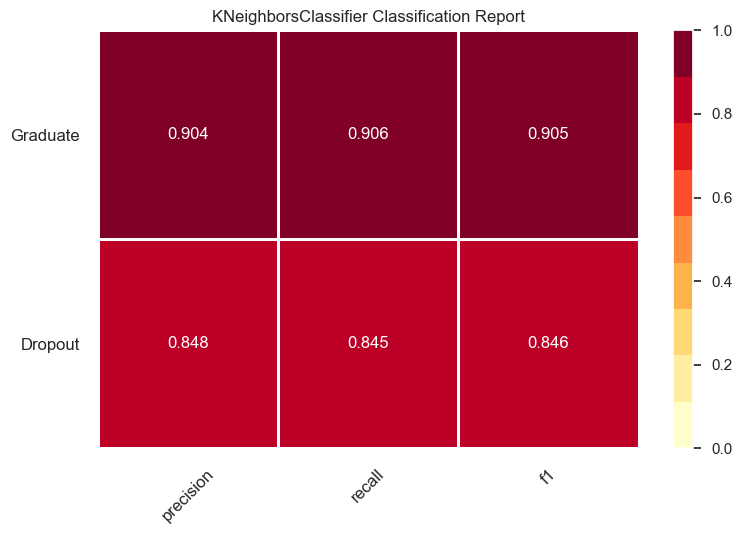

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [211]:
visualizer = ClassificationReport(knc, classes=['Dropout', 'Graduate'])
visualizer.score(X_test_scaled, y_test)
visualizer.show()

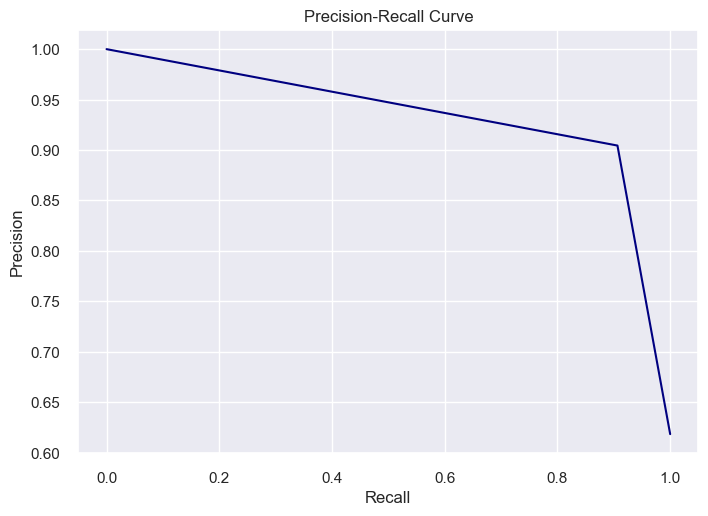

In [212]:
plt.plot(recall_kn, precision_kn, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Decision Tree

Execution time: 0.8843 seconds

Decision Tree accuracy: 0.873

Confusion Matrix
[[232  45]
 [ 47 402]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       277
           1       0.90      0.90      0.90       449

    accuracy                           0.87       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.87      0.87      0.87       726



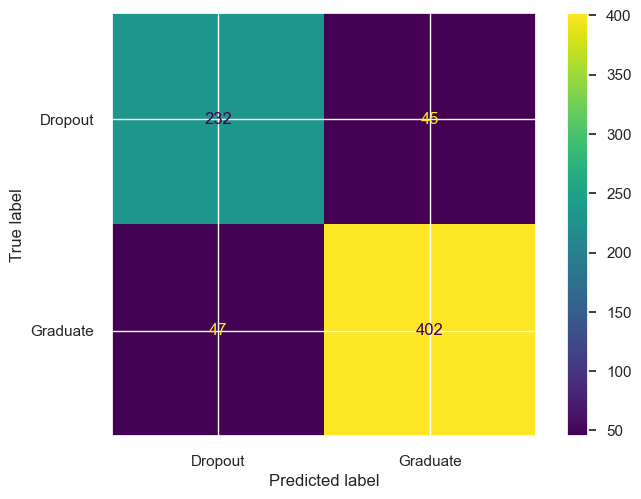

In [213]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

dtc = DecisionTreeClassifier()
end_time = time.time()
dtc.fit(X_train_scaled, y_train)
y_pred = dtc.predict(X_test_scaled)
accuracy_dtc = accuracy_score(y_test, y_pred)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred)
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: {:.4f} seconds".format(execution_time))
print()

print(f'Decision Tree accuracy: {accuracy_dtc:.3f}')
print()
print('Confusion Matrix')
cm_dt = confusion_matrix(y_test, dtc.predict(X_test_scaled))
print(cm_dt)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

cmd = ConfusionMatrixDisplay(cm_dt, display_labels=labels)
cmd.plot()

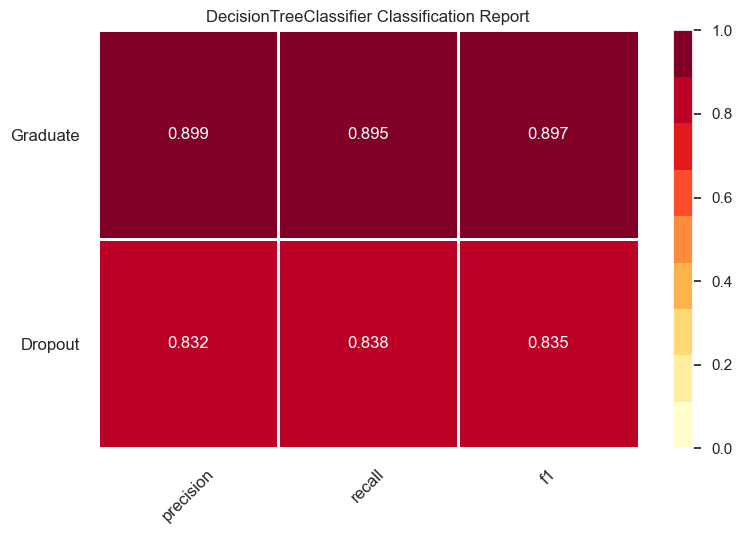

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [214]:
visualizer = ClassificationReport(dtc, classes=['Dropout', 'Graduate'])
visualizer.score(X_test_scaled, y_test)
visualizer.show()

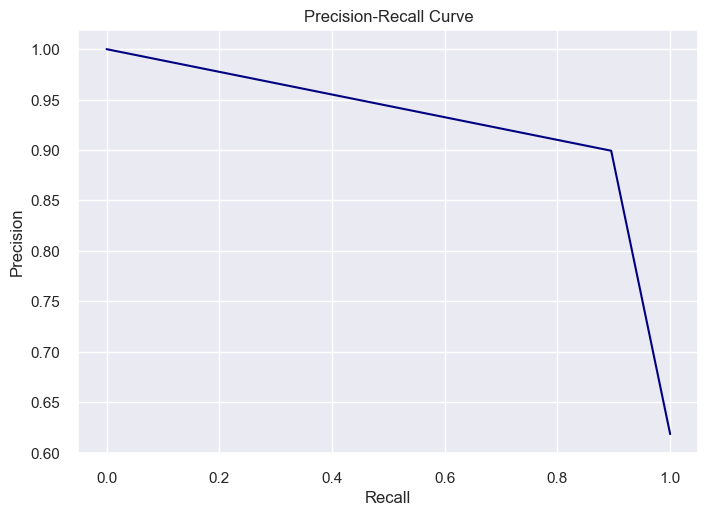

In [215]:
plt.plot(recall_dt, precision_dt, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### SVC

Execution time: 0.1428 seconds

SVM accuracy: 0.890

Confusion Matrix
[[218  59]
 [ 21 428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       277
           1       0.88      0.95      0.91       449

    accuracy                           0.89       726
   macro avg       0.90      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



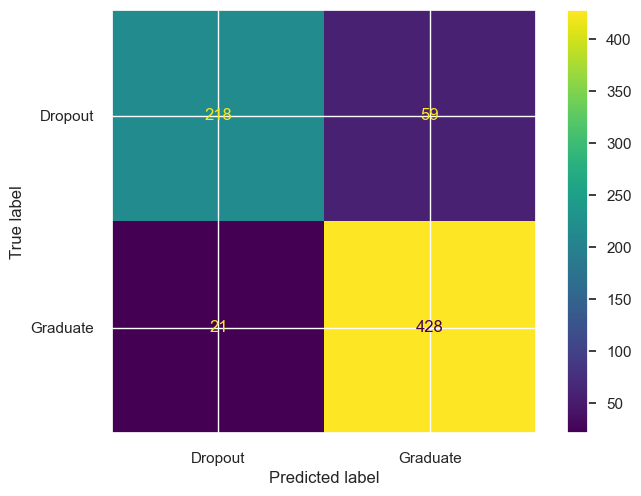

In [216]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
start_time = time.time()
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)
accuracy_svc = accuracy_score(y_test, y_pred)
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_test, y_pred)
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: {:.4f} seconds".format(execution_time))
print()
print(f'SVM accuracy: {accuracy_svc:.3f}')
print()
print('Confusion Matrix')
cm_svc = confusion_matrix(y_test, svm.predict(X_test_scaled))
print(cm_svc)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

cmd = ConfusionMatrixDisplay(cm_svc, display_labels=labels)
cmd.plot()

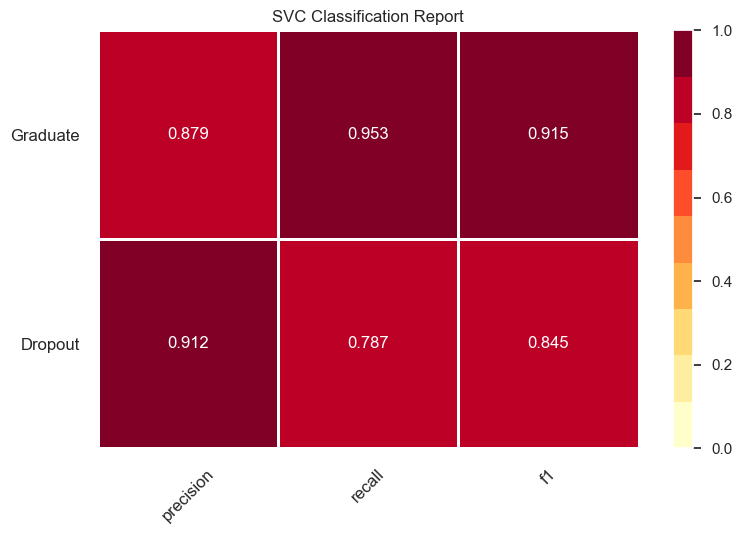

<Axes: title={'center': 'SVC Classification Report'}>

In [217]:
visualizer = ClassificationReport(svm, classes=['Dropout', 'Graduate'])
visualizer.score(X_test_scaled, y_test)
visualizer.show()

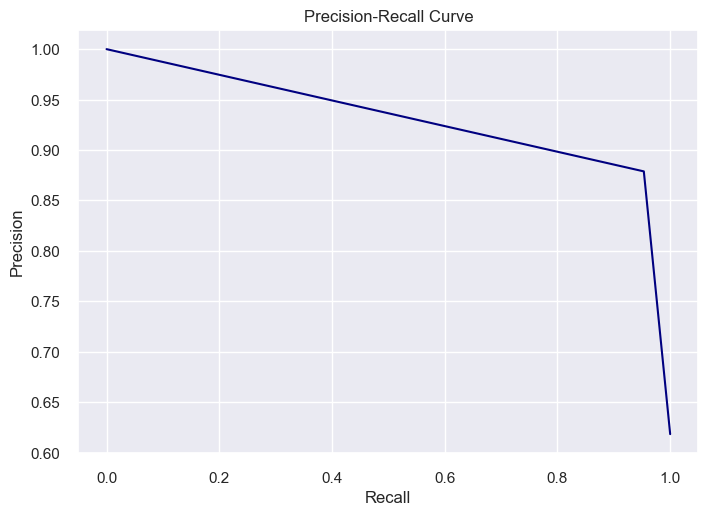

In [218]:
plt.plot(recall_svc, precision_svc, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Gradient Boosting

Execution time: 0.0824 seconds

Gradient Boosting: 0.899

Confusion Matrix
[[227  50]
 [ 23 426]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       277
           1       0.89      0.95      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



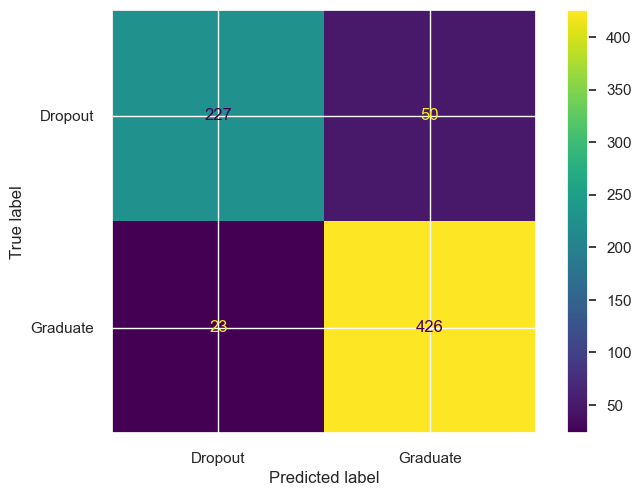

In [219]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
start_time = time.time()
gb.fit(X_train_scaled, y_train)
predict_test = gb.predict(X_test_scaled)
accuracy_gb = gb.score(X_test_scaled, y_test)
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_test, y_pred)
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: {:.4f} seconds".format(execution_time))
print()
print(f'Gradient Boosting: {accuracy_gb:.3f}')
print()
print('Confusion Matrix')
cm_gb = confusion_matrix(y_test, gb.predict(X_test_scaled))
print(cm_gb)
print()
print("Classification Report:")
print(classification_report(y_test, predict_test))

cmd = ConfusionMatrixDisplay(cm_gb, display_labels=labels)
cmd.plot()

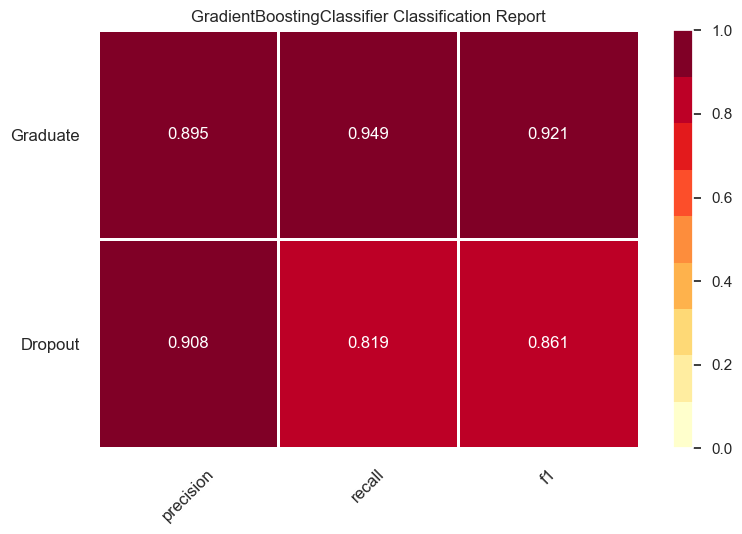

<Axes: title={'center': 'GradientBoostingClassifier Classification Report'}>

In [220]:
visualizer = ClassificationReport(gb, classes=['Dropout', 'Graduate'])
visualizer.score(X_test_scaled, y_test)
visualizer.show()

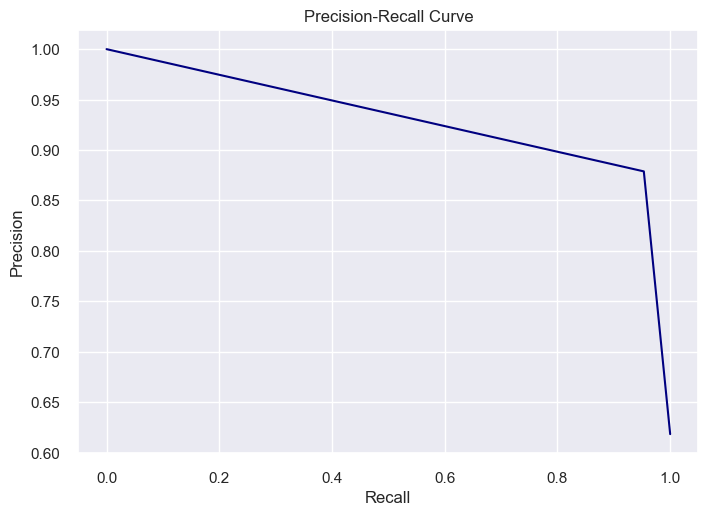

In [221]:
plt.plot(recall_gb, precision_gb, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Random Forest

Execution time: 0.2221 seconds

Random forest accuracy: 0.882

Confusion Matrix
[[227  50]
 [ 36 413]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       277
           1       0.89      0.92      0.91       449

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



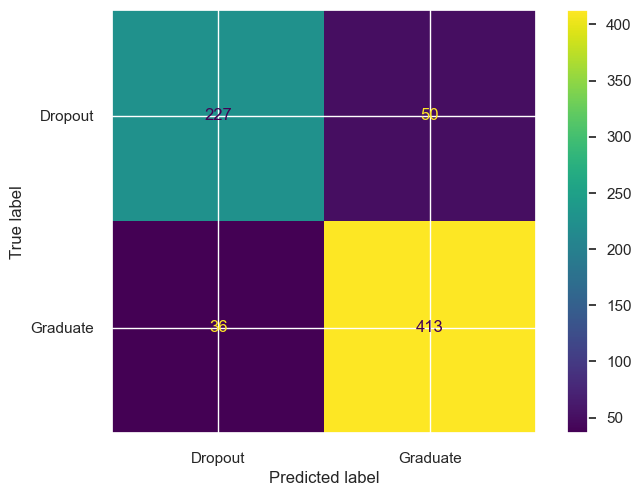

In [222]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred)
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: {:.4f} seconds".format(execution_time))
print()
print(f'Random forest accuracy: {accuracy_rf:.3f}')
print()
print('Confusion Matrix')
cm_rf = confusion_matrix(y_test, rf.predict(X_test_scaled))
print(cm_rf)
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

cmd = ConfusionMatrixDisplay(cm_rf, display_labels=labels)
cmd.plot()

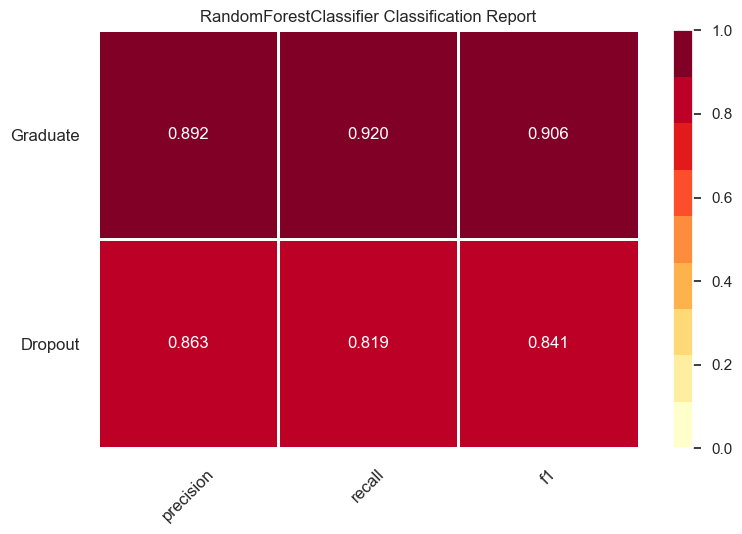

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [223]:
visualizer = ClassificationReport(rf, classes=['Dropout', 'Graduate'])
visualizer.score(X_test_scaled, y_test)
visualizer.show()

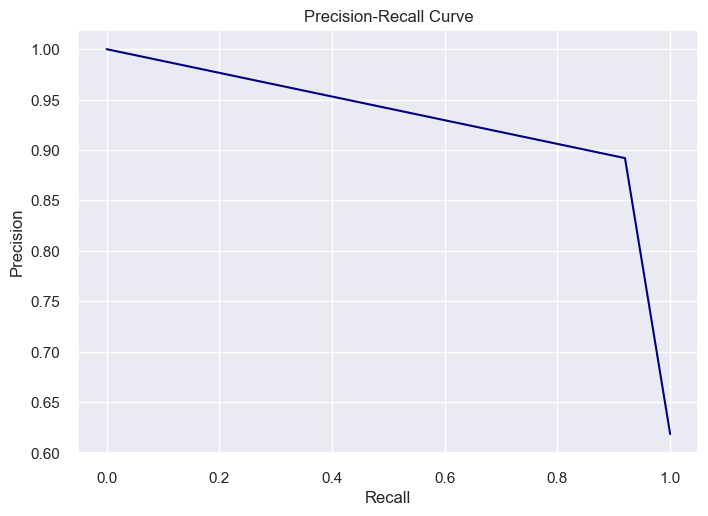

In [224]:
plt.plot(recall_rf, precision_rf, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Neural Network

Execution time: 1.2171 seconds

Neural Network accuracy: 0.882

Confusion Matrix
[[224  53]
 [ 27 422]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       277
           1       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



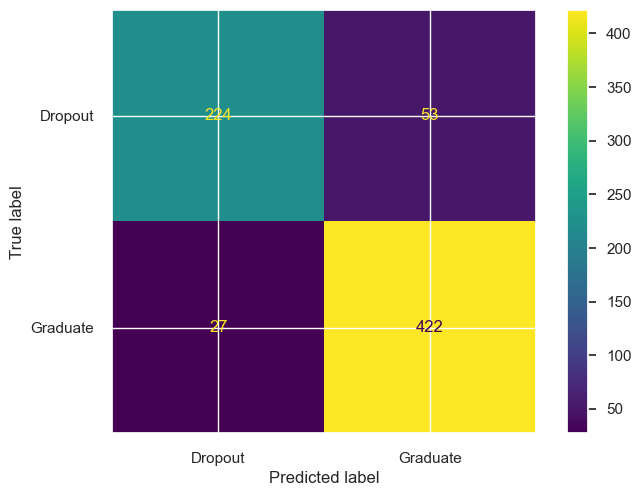

In [225]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
start_time = time.time()
nn.fit(X_train_scaled,y_train)
predict_test = nn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
precision_nn, recall_nn, thresholds_nn = precision_recall_curve(y_test, y_pred)
end_time = time.time()
execution_time = end_time - start_time

print("Execution time: {:.4f} seconds".format(execution_time))
print()
print(f'Neural Network accuracy: {acc:.3f}')
print()
print('Confusion Matrix')
cm_nn = confusion_matrix(y_test,predict_test)
print(cm_nn)
print()
print("Classification Report:")
cr_nn = classification_report(y_test,predict_test)
print(cr_nn)


cmd = ConfusionMatrixDisplay(cm_nn, display_labels=labels)
cmd.plot()

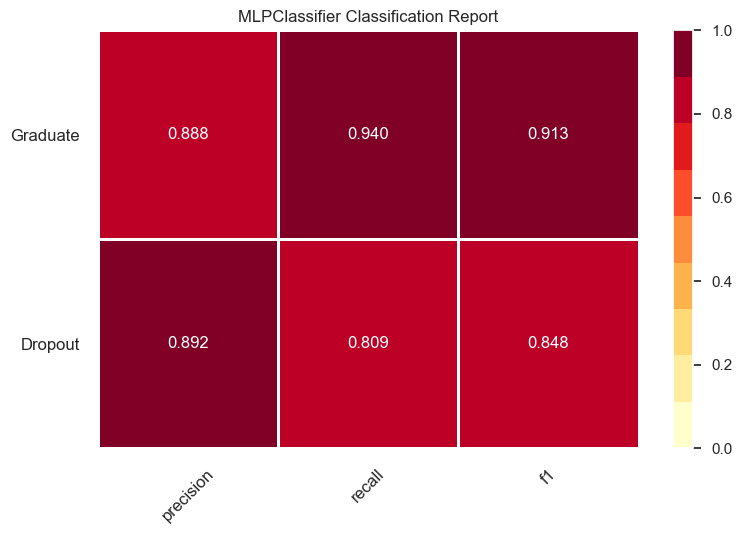

<Axes: title={'center': 'MLPClassifier Classification Report'}>

In [226]:
visualizer = ClassificationReport(nn, classes=['Dropout', 'Graduate'])
visualizer.score(X_test_scaled, y_test)
visualizer.show()

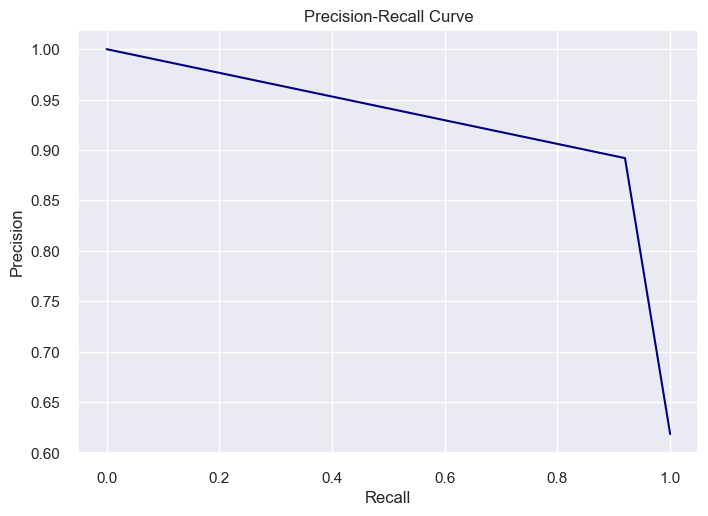

In [227]:
plt.plot(recall_nn, precision_nn, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

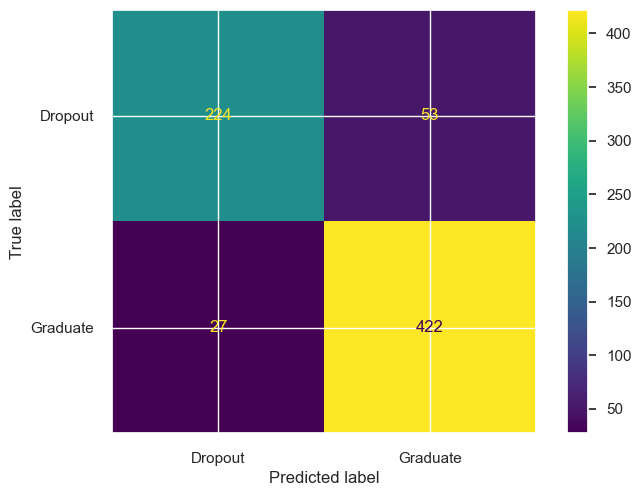

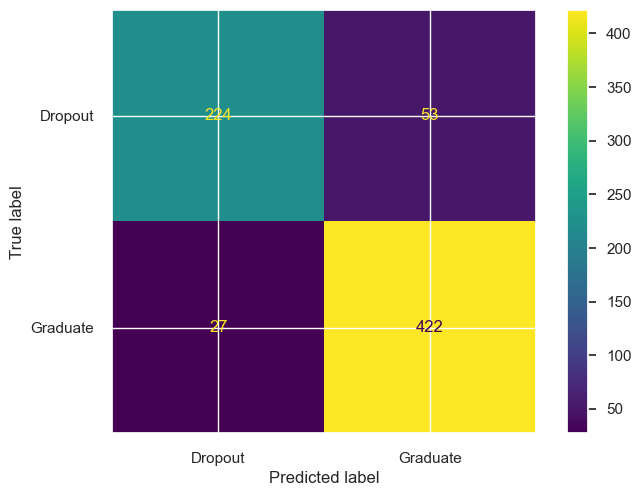

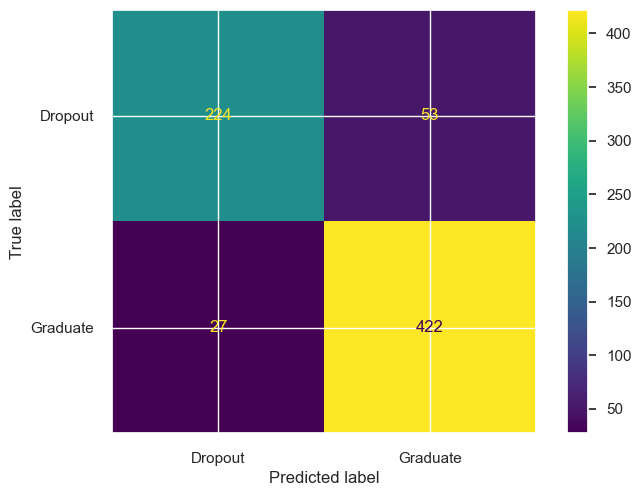

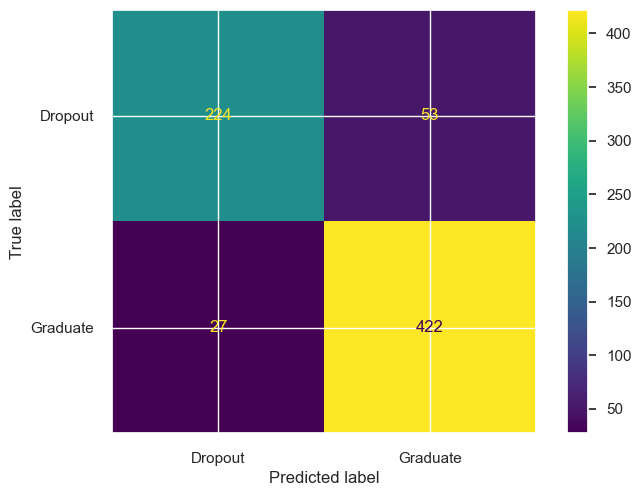

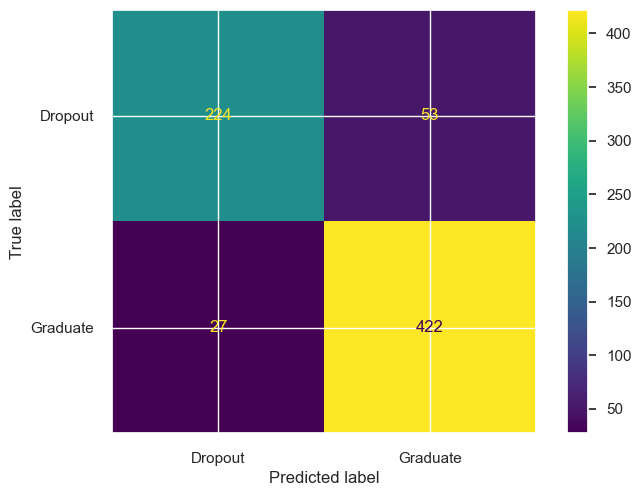

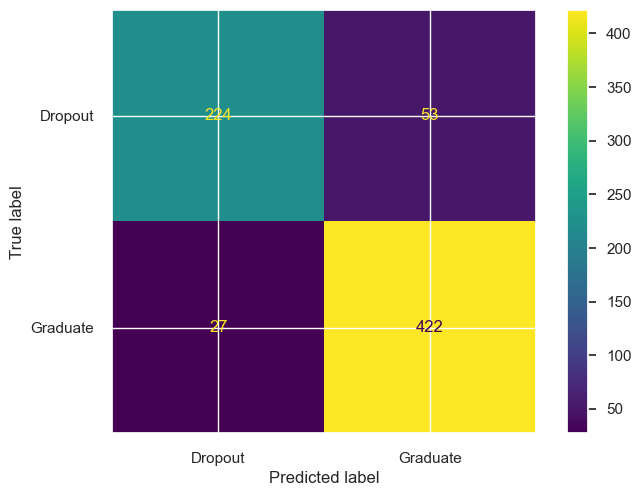

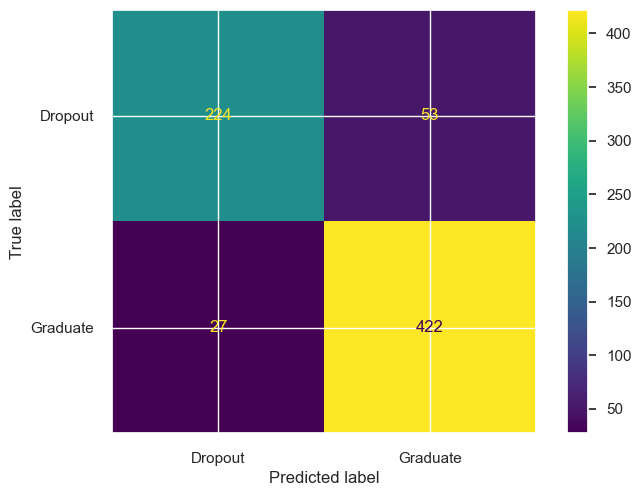

In [228]:
cm_list = [cm_lr, cm_kn, cm_dt, cm_svc, cm_gb, cm_rf, cm_nn]

for i in cm_list:
    ConfusionMatrixDisplay(i, display_labels=labels)
    cmd.plot()
    

In [229]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try out different classification algorithms and evaluate their performance using cross-validation
models = {
    "Logistic Regression": LogisticRegression(), 
    "K-Nearest Neighbors": KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier() 
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Accuracy: {np.mean(scores)}")

Logistic Regression Accuracy: 0.8846376639563178
K-Nearest Neighbors Accuracy: 0.8774081547866344
Decision Tree Accuracy: 0.8601833936732151
Support Vector Machine Accuracy: 0.887742892753279
Gradient Boosting Accuracy: 0.8922161552614399
Random Forest Accuracy: 0.8753391892693928
Neural Network Accuracy: 0.8932488574989614


# Create some data to input in the model

In [230]:
selected_df.head()

,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Target
0,0.0,1.0,1.0,0.0,20.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,19.0,6.0,6.0,1.0
2,0.0,0.0,1.0,0.0,19.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,20.0,6.0,5.0,1.0
4,0.0,1.0,0.0,0.0,45.0,5.0,6.0,1.0


In [231]:
data_scaled2.head()

,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Target
0,-0.358302,0.393167,1.380697,-0.603447,-0.442212,-1.480034,-1.429014,-1.246812
1,-0.358302,-2.543450,1.380697,-0.603447,-0.569976,0.373306,0.468555,0.802046
2,-0.358302,-2.543450,1.380697,-0.603447,-0.569976,-1.480034,-1.429014,-1.246812
3,-0.358302,0.393167,-0.724272,-0.603447,-0.442212,0.373306,0.152293,0.802046
4,-0.358302,0.393167,-0.724272,-0.603447,2.751894,0.064416,0.468555,0.802046


In [232]:
new_data = [[0, 1, 0, 1, 22, 8, 10], [1, 0, 1, 0, 30, 9, 11], [0, 0, 0, 1, 18, 14, 11], 
           [1, 1, 1, 1, 45, 9, 8]]
new_data_df = pd.DataFrame(new_data)
new_data_df.head()

,0,1,2,3,4,5,6
0,0,1,0,1,22,8,10
1,1,0,1,0,30,9,11
2,0,0,0,1,18,14,11
3,1,1,1,1,45,9,8


In [233]:
scaler_2 = StandardScaler()
data_scaled_test = scaler_2.fit_transform(new_data_df)
data_scaled_test = pd.DataFrame(data_scaled_test, columns=new_data_df.columns)
data_scaled_test.head()

,0,1,2,3,4,5,6
0,-1.0,1.0,-1.0,0.577350,-0.653502,-0.852803,0.000000
1,1.0,-1.0,1.0,-1.732051,0.121019,-0.426401,0.816497
2,-1.0,-1.0,-1.0,0.577350,-1.040763,1.705606,0.816497
3,1.0,1.0,1.0,0.577350,1.573246,-0.426401,-1.632993


In [234]:
lr.predict(data_scaled_test)

array([1, 1, 1, 0])

In [235]:
knc.predict(data_scaled_test)

array([1, 0, 1, 0])

In [236]:
dtc.predict(data_scaled_test)

array([0, 0, 1, 0])

In [237]:
svm.predict(data_scaled_test)

array([1, 1, 1, 0])

In [238]:
gb.predict(data_scaled_test)

array([1, 1, 1, 0])

In [239]:
rf.predict(data_scaled_test)

array([1, 0, 1, 0])

In [241]:
nn.predict(data_scaled_test)

array([1, 0, 1, 0])